In [1]:
%%javascript 
IPython.OutputArea.auto_scroll_threshold = 999999;

<IPython.core.display.Javascript object>

In [2]:
%autoreload 2
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
from __future__ import (print_function, division)
import pandas as pd
import h5py
import sys
sys.path.append("../")
import extract_catalog as ec
import get_DM_centroids as getDM
import get_gal_centroids as getgal
import seaborn as sns

/Users/karenyng/Documents/illustris_analyses/code/IlEnv/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
import compute_distance as compDist
import plot_DM_prop as plotDM
import plot_gal_prop as plotgal

In [5]:
sns.set_style('white')

In [6]:
# main datafile
data_path = "../../data/"
main_h5 = h5py.File(
    data_path + 
    "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5", 
    "r")

total_clstNo = 43
date_stamp = '05_23_16'

In [7]:
data_path = "../../data/test_results/"

# load the data

This particular set of data file only has 6 projections per cluster.
But we will use the data with 384 projections for the final results.

In [8]:
DM_fhats = \
    h5py.File(
        data_path + "test_DM_fhat_clst{0}_{1}.h5".format(
            total_clstNo, date_stamp), 'r')
    

star_fhats = \
    h5py.File(
        data_path + "test_stars_fhat_clst{0}_{1}.h5".format(
            total_clstNo, date_stamp), 'r')

# figure out the paths to the relevant quantities inside the HDF5 file

In [9]:
star_fhat_path_lists = compDist.retrieve_cluster_path(star_fhats)
star_fhat = star_fhats[star_fhat_path_lists[0]]

In [10]:
clstNo_list = np.unique([int(p.split('/')[0]) 
                         for p in star_fhat_path_lists]
                       )

In [11]:
R200C = main_h5["Group"]['Group_R_Crit200'][:clstNo_list[-1] + 1]

# we have 2 sets of DM density estimates 

this is due to two different kernel smoothing size

In [12]:
DM_fhat_path = []
DM_fhats.visit(DM_fhat_path.append)

In [13]:
star_fhat_path = []
star_fhat.visit(star_fhat_path.append)

# Code for generating Fig. 4 in the paper

pick clusters that we are going to show

In [14]:
DM_path_list = [
    "1/mag/i_band/1/('0.8410686706', '3.9269908170')/0.0",
    "1/mag/i_band/1/('0.8410686706', '3.9269908170')/25.0",
    "1/mag/i_band/1/('0.8410686706', '2.3561944902')/0.0",
    "1/mag/i_band/1/('0.8410686706', '2.3561944902')/25.0",
    "12/mag/i_band/1/('0.8410686706', '2.3561944902')/0.0",
    "12/mag/i_band/1/('0.8410686706', '2.3561944902')/25.0",
]

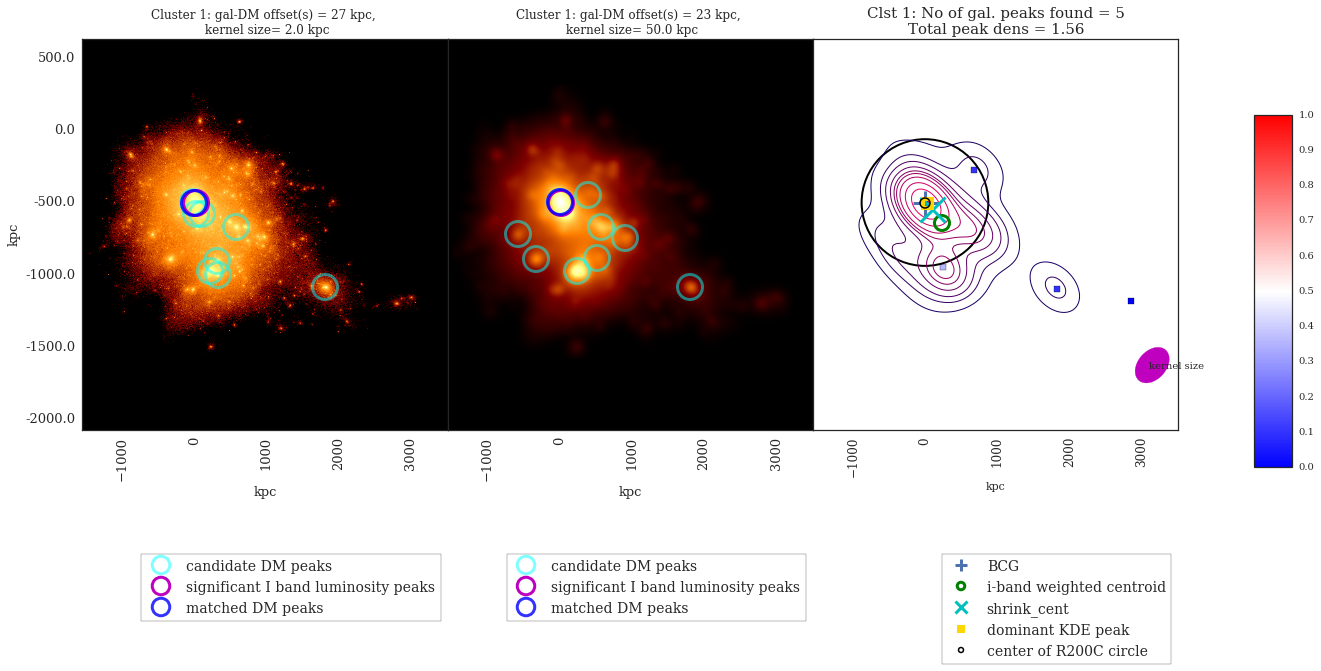

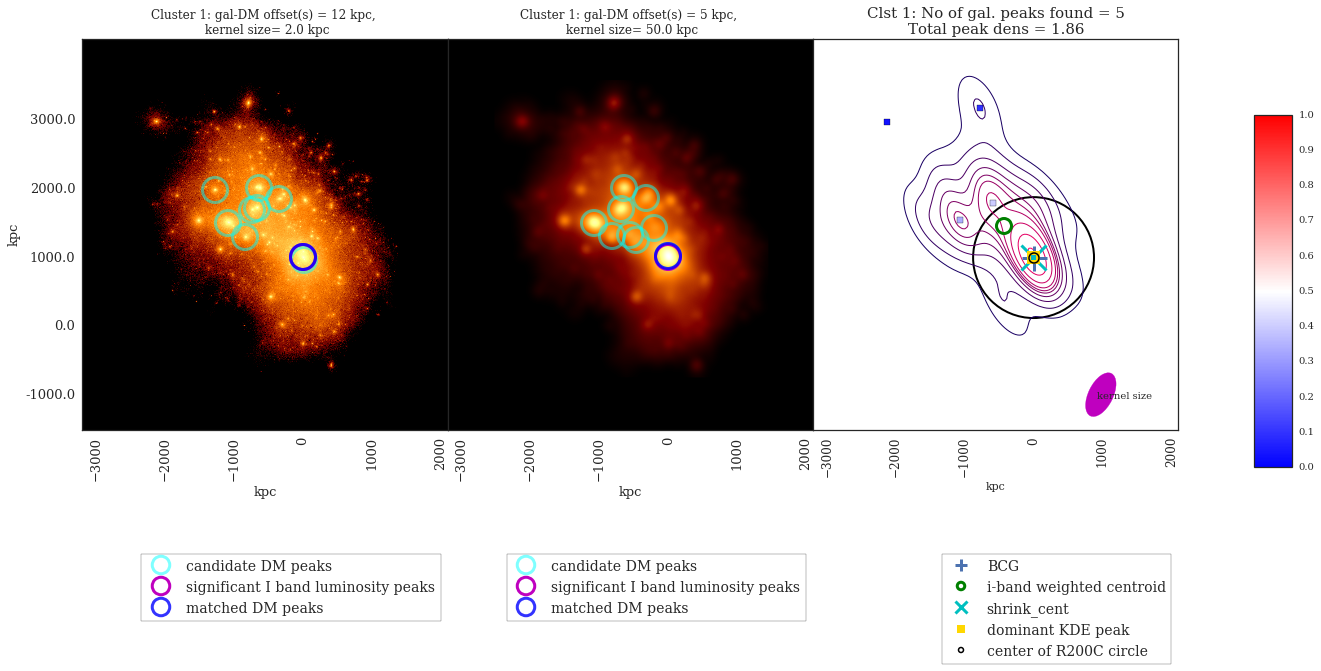

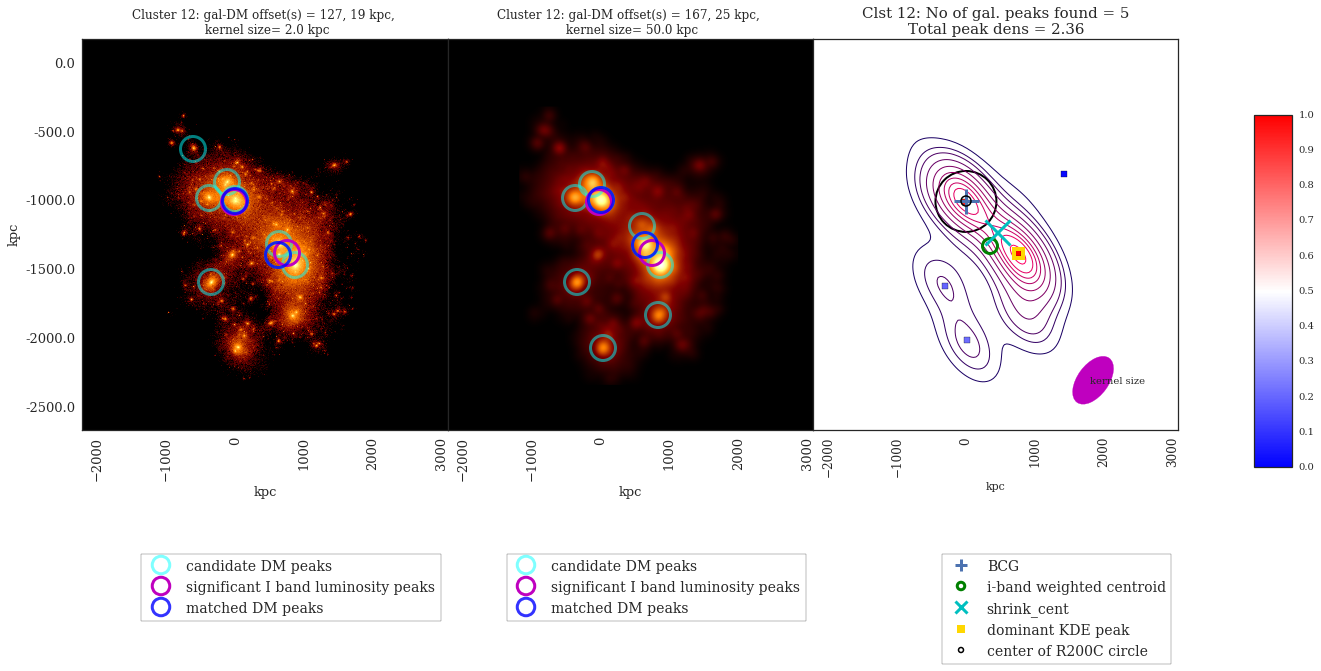

In [22]:
verbose = False
for index in range(len(DM_path_list) // 2):
    
    flip_y = 1.
    fig = plt.figure(figsize=(21, 7))
    legend_box_anchor = (1., -.3)
    
    path1 = DM_path_list[2 * index]
    clstNo = path1.split('/')[0]
    DM_clst_dict1 = DM_fhats[path1]
    
    path2 = DM_path_list[2 * index + 1]
    clstNo = path2.split('/')[0]
    kernel_width = float(path2.split('/')[-1])
    DM_clst_dict2 = DM_fhats[path2]
    
    path3 = '/'.join(path1.split('/')[:-1])
    star_fhat = star_fhats[path3]
    
    fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True, figsize=(21, 7))
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.90, 0.05, 0.025, 0.7])
    fig.subplots_adjust(wspace=0)
    
    
    # ax1 = fig.add_subplot(131, axisbg='black', aspect='equal')
    ax1, ax2, ax3 = axes
    ax1.set_axis_bgcolor('black')
    ax1, xlims, ylims = plotDM.plot_DM_fhat(
        fhat=DM_clst_dict1, fhat_stars=star_fhat, clstNo=clstNo, ax=ax1,
        legend_box_anchor=legend_box_anchor, verbose=verbose, log_scale=True, 
        flip_y=1., origin='lower'
    )    
    
    # ax2 = fig.add_subplot(132, axisbg='black', aspect='equal')
    ax2.set_axis_bgcolor('black')
    ax2.get_yaxis().set_visible(False)
    ax2, xlims, ylims = plotDM.plot_DM_fhat(
        fhat=DM_clst_dict2, fhat_stars=star_fhat, clstNo=clstNo, ax=ax2,
        legend_box_anchor=legend_box_anchor, log_scale=False, flip_y=flip_y,
        kernel_width=kernel_width, verbose=verbose, origin='lower', power=1/2.
    )
    
    # ax3 = fig.add_subplot(133, aspect='equal')
    ax3.get_yaxis().set_visible(False)
    ax3.tick_params(axis='both',which='major', labelsize=12)
    sc = plotgal.plot_KDE_peaks(
        star_fhat, allPeaks=True, R200C=R200C[int(clstNo)],
        showData=True, clstNo=clstNo, ax=ax3, fig=fig,
        plotDataPoints=False, save=False, legend_box_anchor=(1, -.3),
        flip_y=flip_y, convert_kpc_over_h_to_kpc=True, colorbar_ax=cbar_ax) #  xlims=xlims, 
        # ylims=ylims
    # )

    
    path_list = path1.split('/')
    angles = np.array(eval(path_list[4])).astype(np.float64) / np.pi * 180.
    filename = "Fig4_clst{0}_{1:0.0f}_{2:0.0f}.png".format(path_list[0], *list(angles))
    savepath = "../../paper/figures/finalized/"
    fig.savefig(savepath + filename, bbox_inches='tight')
    plt.show()
    plt.close()

# Visualize different types of galaxy summary stat vs DM peaks

* BCG 
* gal KDE peaks 
* shrink aperture 
* weighted centroids 

we get the DM peak from the matching gal KDE peaks 

In [31]:
DM_fhat = DM_fhats[path1]
star_path = '/'.join(path1.split('/')[:-1])

In [33]:
star_fhat = star_fhats[star_path]

In [71]:
sum_dists

{'BCG': 9.2047912981351825,
 'centroid': 306.2187104580571,
 'shrink_cent': 374.7074285778217}

### visualize to make sure the computed distances make sense

In [85]:
DM_clst_dict1 = DM_fhat
clstNo = path1.split('/')[0]

summary_stat_keys = ['BCG', 'centroid', 'shrink_cent']
marker_style = {
    'BCG': 'b+',
    'centroid': 'go',
    'shrink_cent': 'cx'
}

In [91]:
DM_path_list = \
    compDist.retrieve_cluster_path(DM_fhats)

HDF5 path to vis =  0/mag/i_band/1/('0.8410686706', '0.7853981634')/0.0
BCG [ 0.  0.]
centroid [-419.31091563 -422.16776214]
shrink_cent [-42.68198483  -1.82626763]


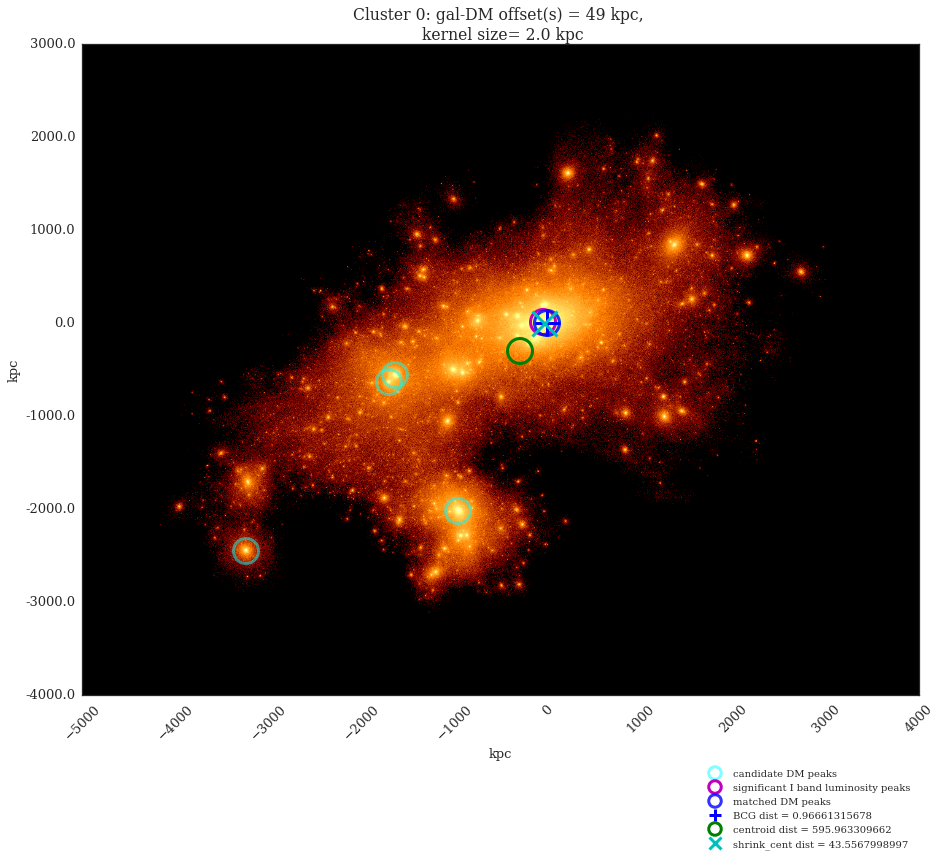

HDF5 path to vis =  0/mag/i_band/1/('0.8410686706', '2.3561944902')/0.0
BCG [ 0.  0.]
centroid [-306.29910021 -548.51881292]
shrink_cent [-15.56157025 -29.07398415]


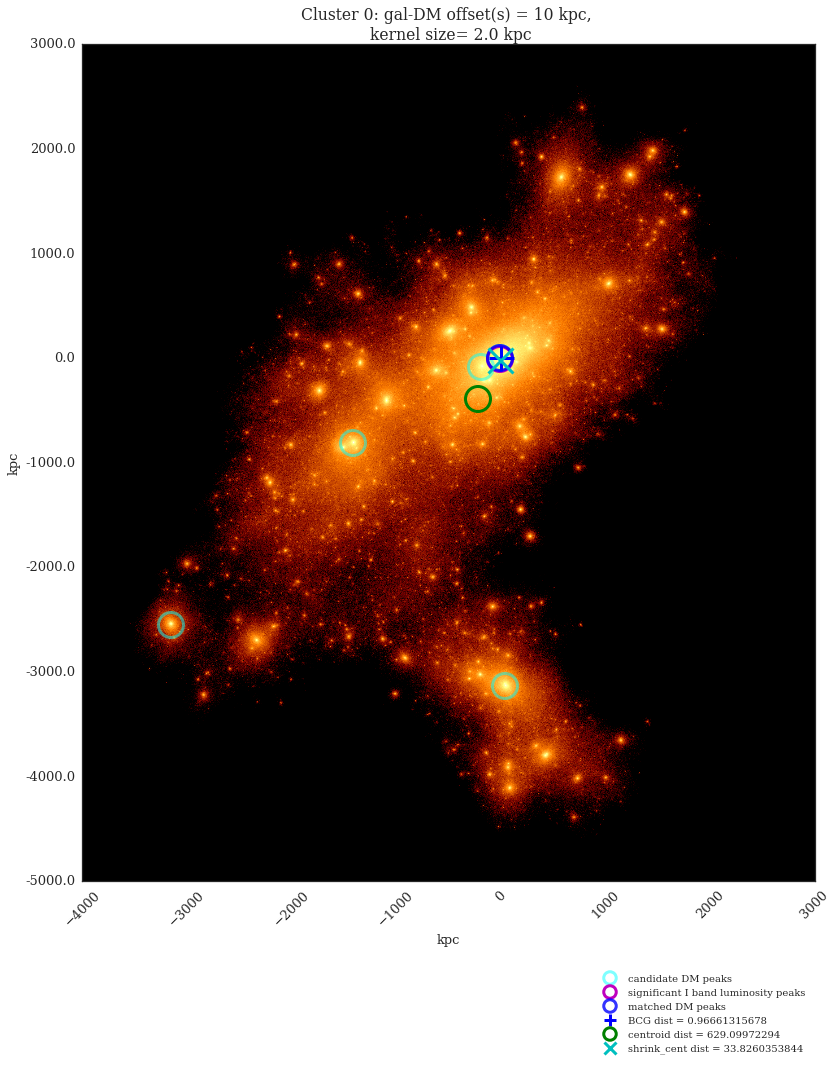

HDF5 path to vis =  0/mag/i_band/1/('0.8410686706', '3.9269908170')/0.0
BCG [ 0.  0.]
centroid [-466.1437969  -369.80700909]
shrink_cent [-1.22929443  0.81678566]


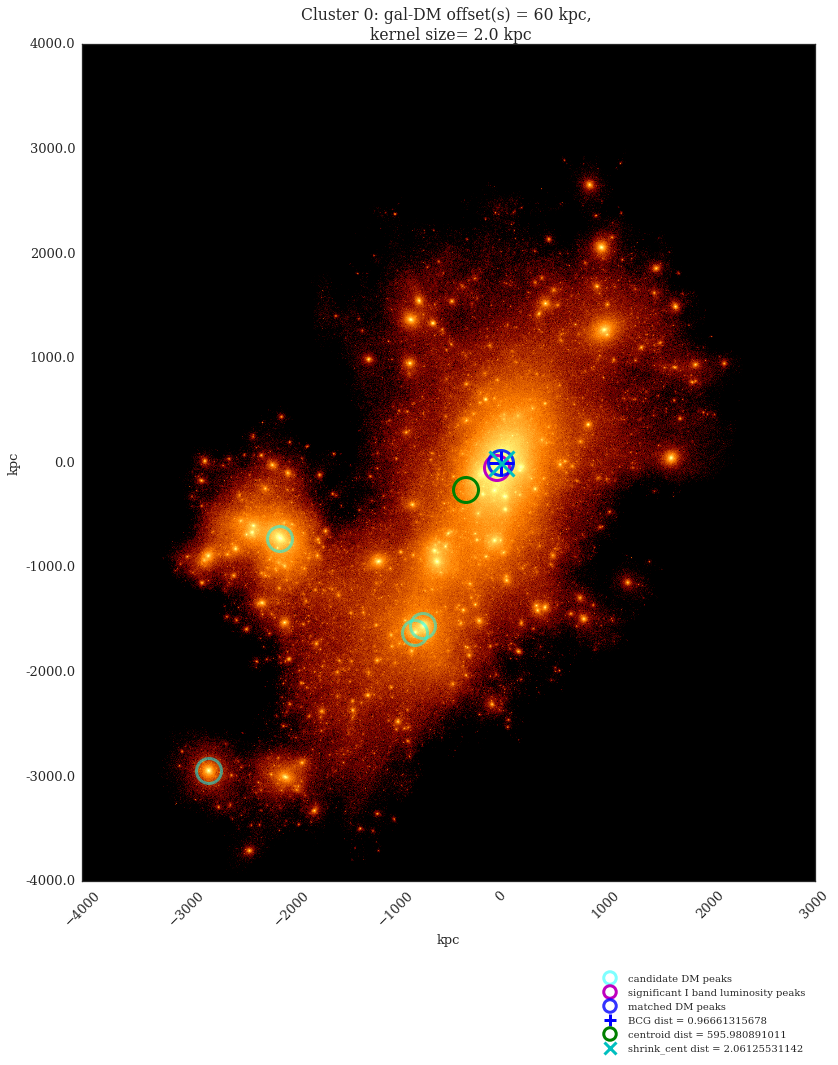

HDF5 path to vis =  0/mag/i_band/1/('0.8410686706', '5.4977871438')/0.0
BCG [ 0.  0.]
centroid [-579.15561232 -243.45595831]
shrink_cent [-30.63731594 -12.27229207]


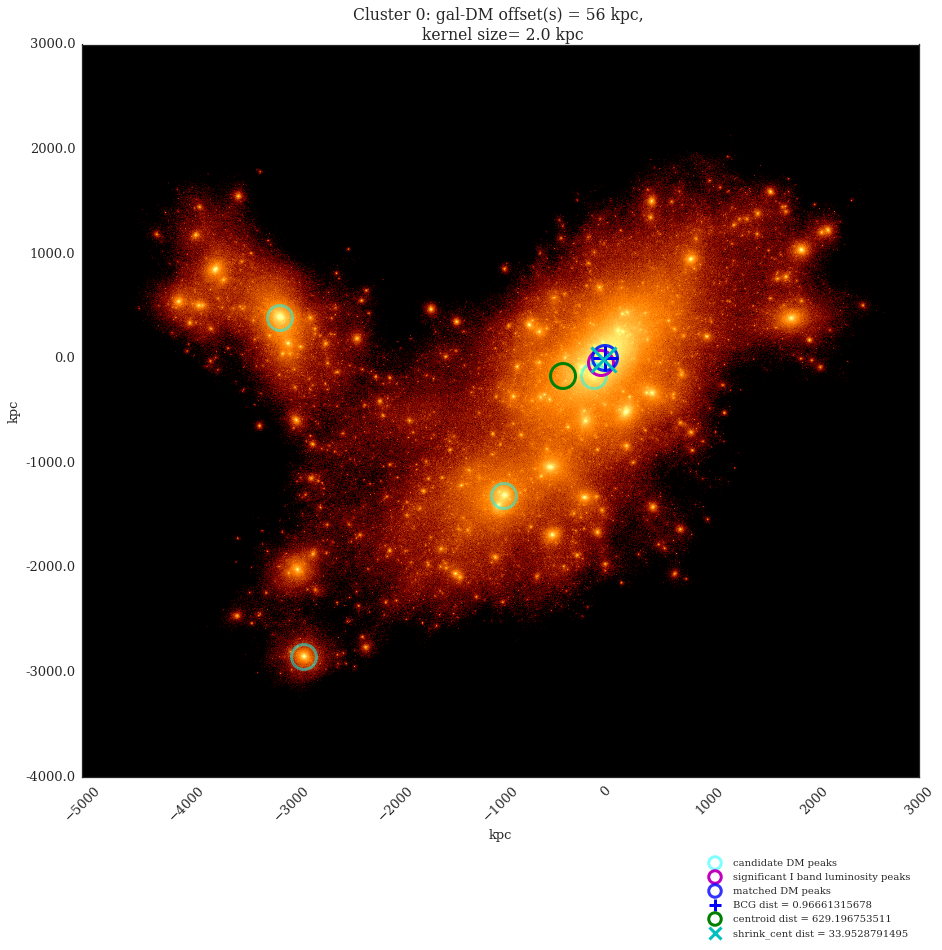

HDF5 path to vis =  0/mag/i_band/1/('1.5707963268', '0.0000000000')/0.0
BCG [ 0.  0.]
centroid [-593.98107845  119.86713157]
shrink_cent [-21.64775568  17.03849859]


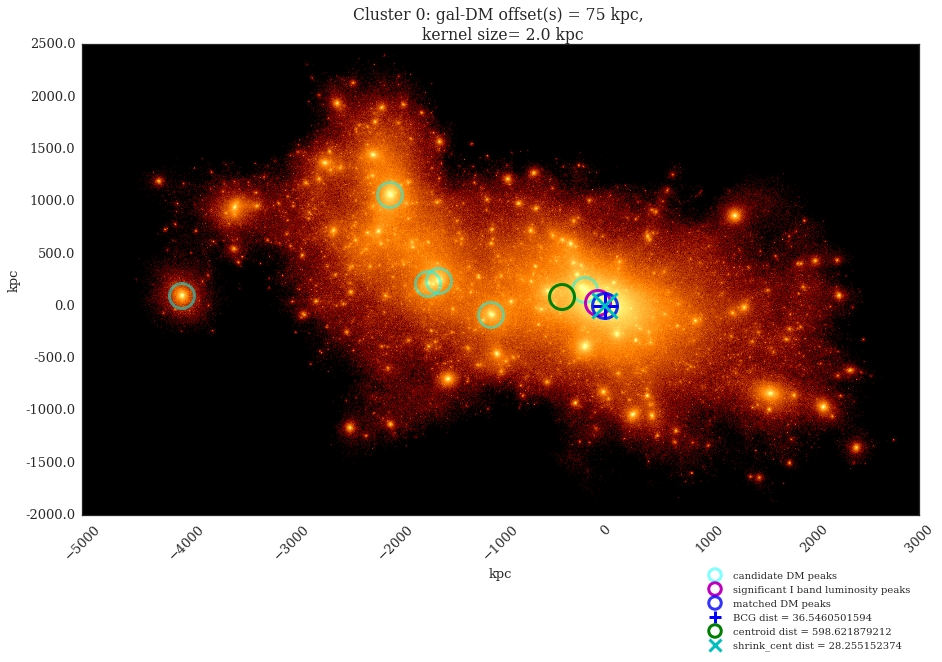

HDF5 path to vis =  0/mag/i_band/1/('1.5707963268', '1.5707963268')/0.0
BCG [ 0.  0.]
centroid [-593.98107845 -169.54090345]
shrink_cent [-37.16065408  68.05545261]


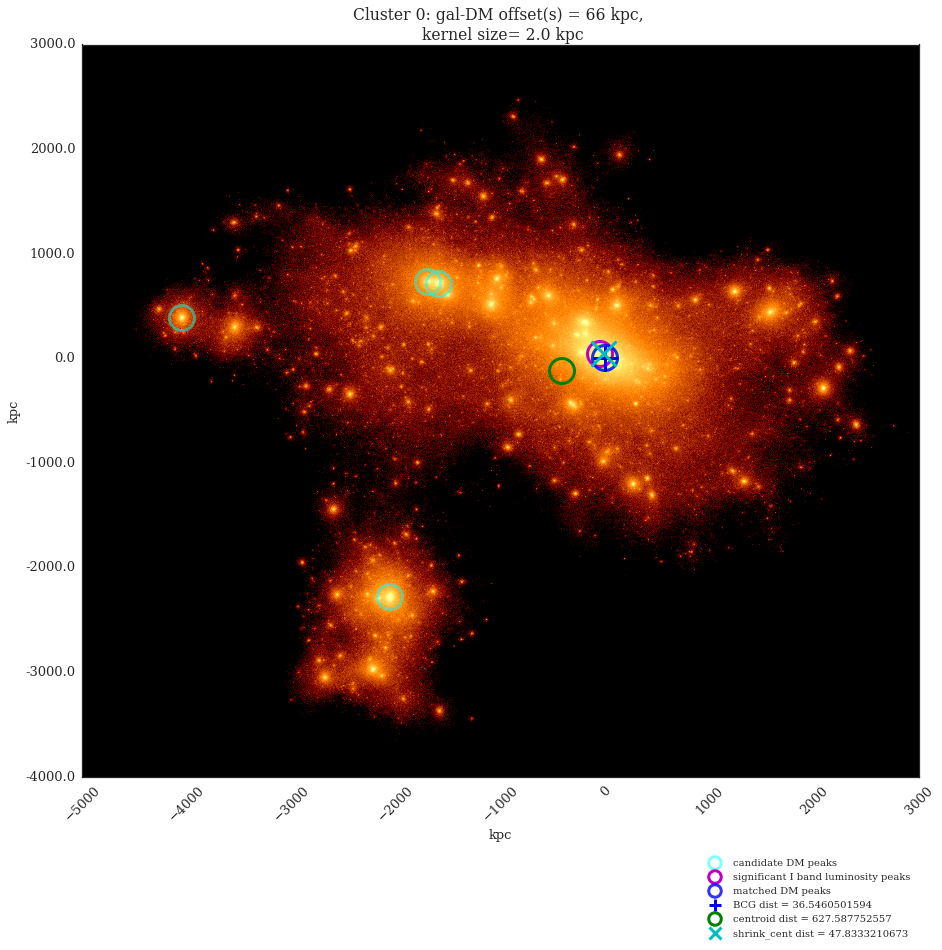

HDF5 path to vis =  1/mag/i_band/1/('0.8410686706', '0.7853981634')/0.0
BCG [ 0.  0.]
centroid [-256.71160631  267.65111685]
shrink_cent [ 7.02636205 -3.61465601]


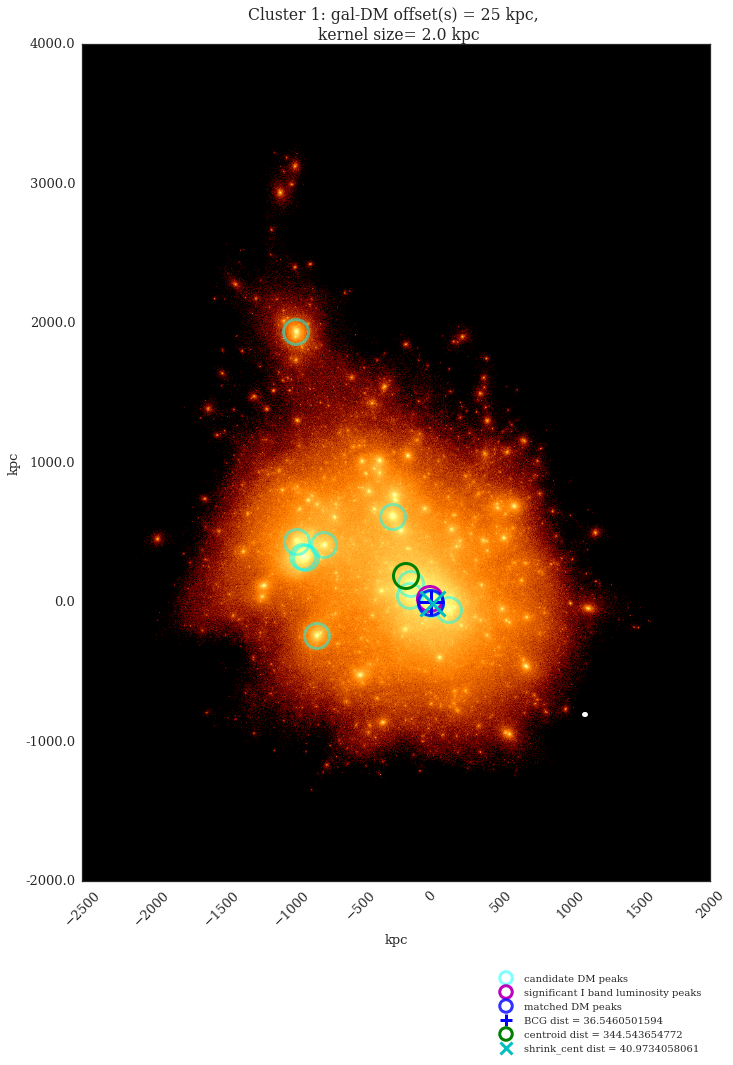

HDF5 path to vis =  1/mag/i_band/1/('0.8410686706', '2.3561944902')/0.0
BCG [ 0.  0.]
centroid [-424.66146156  455.42476344]
shrink_cent [-2.4351361   3.89776858]


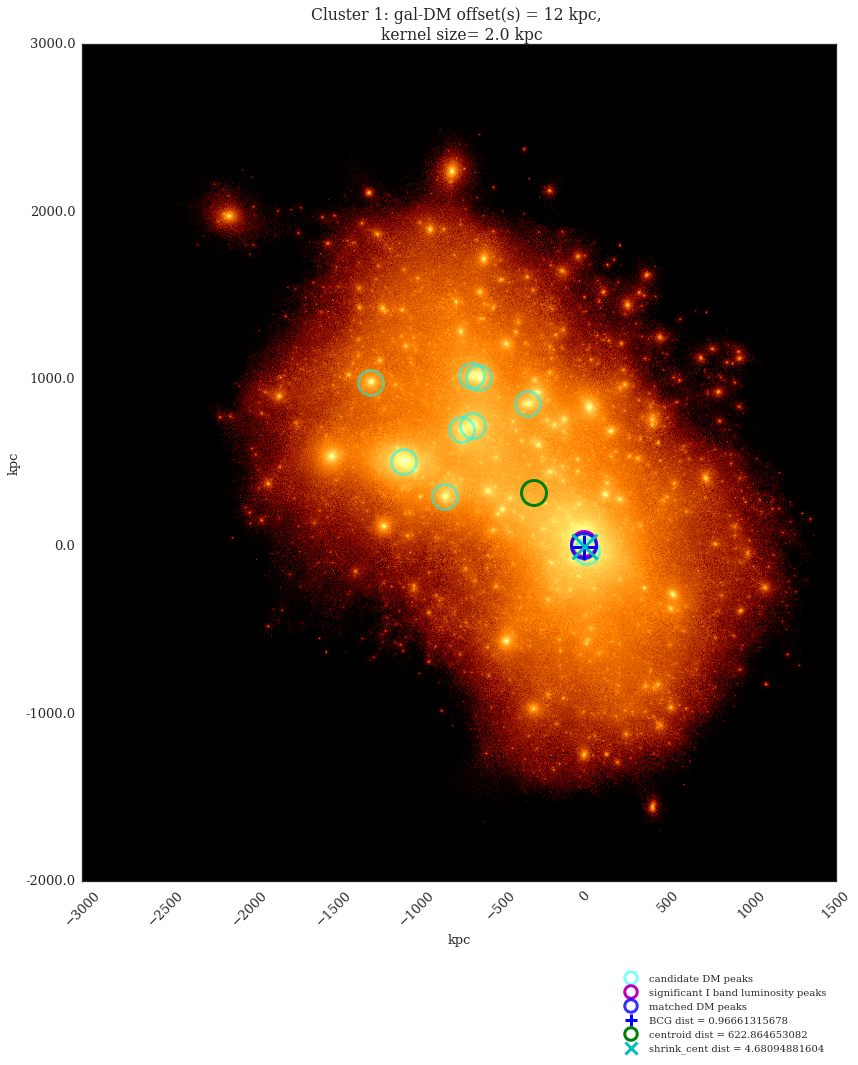

HDF5 path to vis =  1/mag/i_band/1/('0.8410686706', '3.9269908170')/0.0
BCG [ 0.  0.]
centroid [ 237.47030663 -284.86105848]
shrink_cent [ 100.93460043  -95.22797052]


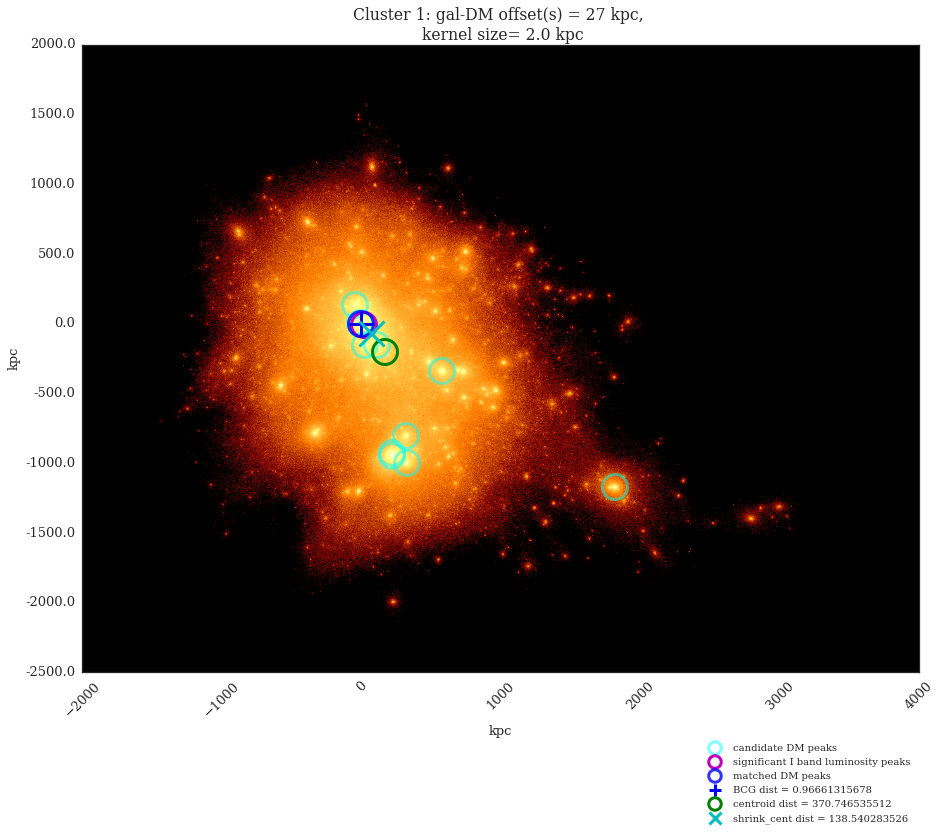

HDF5 path to vis =  1/mag/i_band/1/('0.8410686706', '5.4977871438')/0.0
BCG [ 0.  0.]
centroid [ 405.42016188 -472.63470506]
shrink_cent [ 43.30755621 -48.12781957]


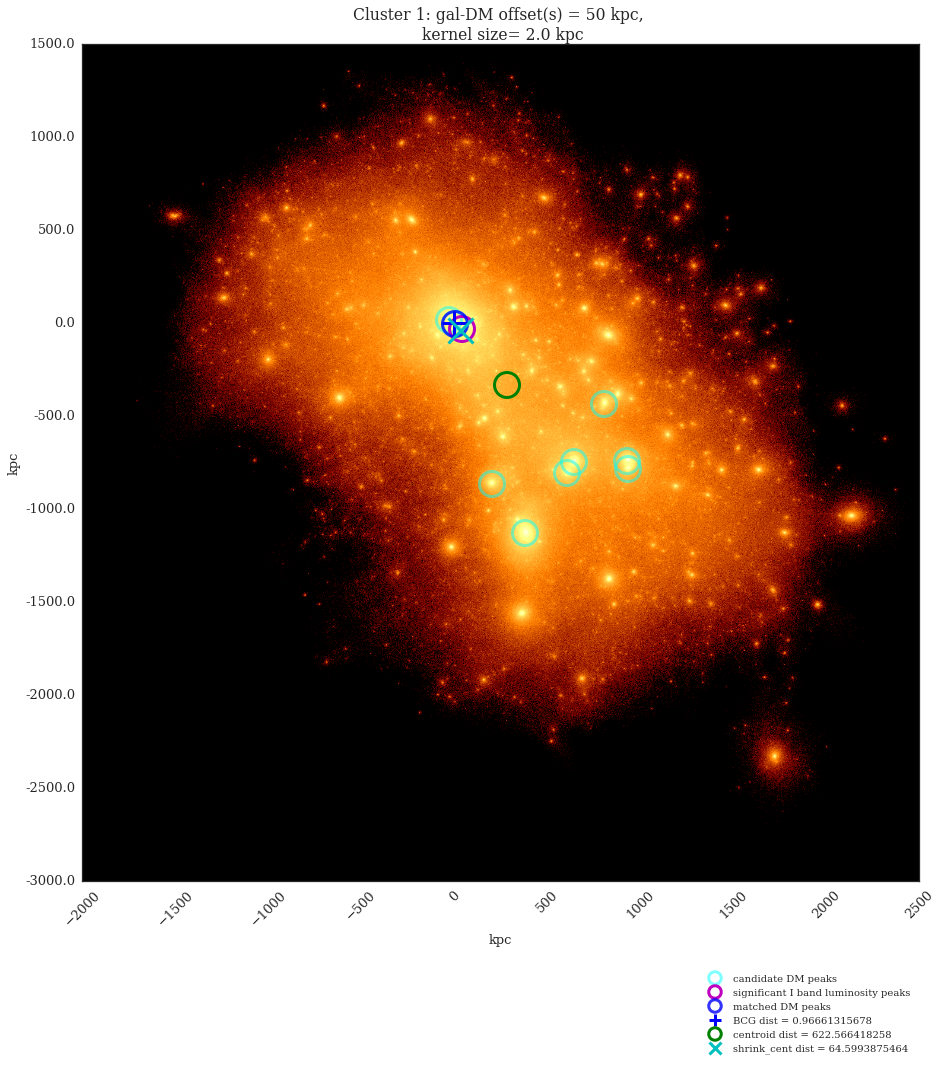

In [99]:
legend_box_anchor = (1., -.1)
flip_y = 1.
unit_conversion = 1./0.704
for index in range(len(DM_path_list) // 2)[:10]:
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, aspect='equal', axisbg='black')

    path1 = DM_path_list[2 * index]
    print ("HDF5 path to vis = ", path1)
    clstNo = path1.split('/')[0]
    DM_clst_dict = DM_fhats[path1]
    
    path3 = '/'.join(path1.split('/')[:-1])
    star_fhat = star_fhats[path3]
    
    _, xlims, ylims = plotDM.plot_DM_fhat(
        fhat=DM_clst_dict, fhat_stars=star_fhat, clstNo=clstNo, ax=ax,
        legend_box_anchor=legend_box_anchor, verbose=verbose, log_scale=True, 
        flip_y=flip_y, origin='lower', show_legend=False
    )    

    matched_outputs = \
        compDist.compute_distance_between_DM_and_gal_peaks(
            star_fhat, DM_clst_dict1
        )

    sum_dists = compDist.compute_distance_for_other_peaks(
        matched_outputs, star_fhat, summary_stat_keys,
        unit_conversion=unit_conversion 
    )

    for sum_key in summary_stat_keys:
        ax.plot(star_fhat[sum_key][0], star_fhat[sum_key][1], 
                marker_style[sum_key], ms=25, mew=3, 
                label='{0} dist = {1}'.format(
                    sum_key, sum_dists[sum_key]), fillstyle='none')
        print (sum_key, star_fhat[sum_key][:] * unit_conversion)

    ax.legend(numpoints=1, bbox_to_anchor=legend_box_anchor, markerscale=0.5)
    # ax.plot(star_fhat[''])/l

    plt.show()
    plt.close()